In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [11]:
# fig = plt.figure(figsize=(7, 4))
# fig.tight_layout()
# ax = fig.add_subplot(111)

# df["MaxFitness"] = df["Paths"] * 2
# sns.lineplot(data=df, x="Iteration", y="Paths", ax=ax)
# sns.lineplot(data=df[df["Paths"] > 0], x="Iteration", y="MaxFitness", ax=ax, linestyle="dotted", color="red")
# ax.set_yticks([df["Fitness"].min(), df["Fitness"].max(), df["Paths"].min(), df["Paths"].max(), df["MaxFitness"].max()])


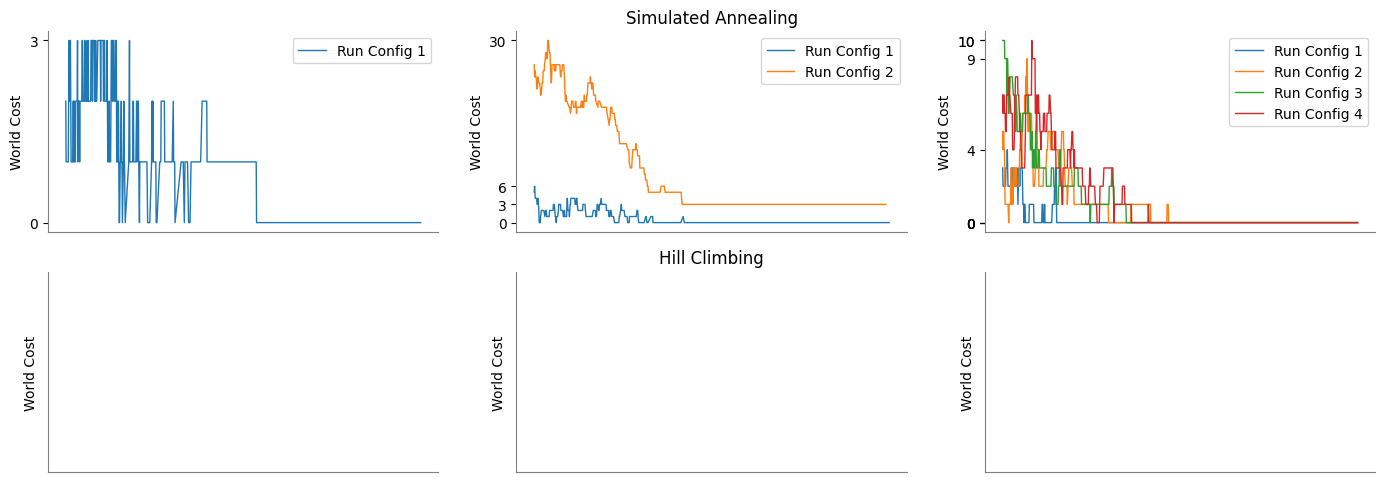

In [64]:
df_map = {
    "Problem 1": {
        "SA": {
            "Run Config 1": "p1_sa_rc-1_srand-0.csv",
        },
        "HC": {}
    },

    "Problem 2": {
        "SA": {
            "Run Config 1": "p2_sa_rc-1_srand-0.csv",
            "Run Config 2": "p2_sa_rc-2_srand-0.csv",
        },
        "HC": {}
    },

    "Problem 3": {
        "sa": {
            "Run Config 1": "p3_sa_rc-1_srand-0.csv",
            "Run Config 2": "p3_sa_rc-2_srand-0.csv",
            "Run Config 3": "p3_sa_rc-3_srand-0.csv",
            "Run Config 4": "p3_sa_rc-4_srand-0.csv",
        },
        "hc": {}
    }
}

# Setup all figure and axes stuff
colors = sns.color_palette("tab10")
fig, axes = plt.subplots(2, 3, figsize=(14, 5))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2, wspace=0.2)
axes[0, 1].set_title("Simulated Annealing")
axes[1, 1].set_title("Hill Climbing")

# Draw all problems to algorithm
for i, p in enumerate(df_map.keys()):
    for j, alg in enumerate(df_map[p].keys()):
        ax = axes[j, i]

        # Draw all run configurations to problem / algorithm
        dfs = []
        for k, rc in enumerate(df_map[p][alg].keys()):
            df = pd.read_csv(df_map[p][alg][rc])
            df["Fitness"] *= -1

            # Set linestyle and color
            color = colors[k % len(colors)]
            sns.lineplot(data=df, x="Iteration", y="Fitness", ax=ax, color=color, linewidth=1, label=rc)
            dfs.append(df)

        # Remove ticks from ax
        ax.set_xticks([])
        ax.set_xlabel("")
        ax.set_ylabel("World Cost")

        # Set yticks to include min and max of each dfs
        yticks = []
        for df in dfs:
            yticks.append(df["Fitness"].min())
            yticks.append(df["Fitness"].max())
        ax.set_yticks(yticks)

        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.spines['left'].set_color('gray')
        ax.spines['bottom'].set_color('gray')

plt.show()
